<center>
    <h2>Minor Project (2021-22)</h2>
    <h1>Automated Tool life Prediction System</h1>
</center>


### Introduction
Dana Anand India Private Limited designs and manufactures drivetrain products for the OEMs of utility vehicles and commercial vehicles, off-highway and the related aftermarket segments, domestically and internationally. One of the challenges for the company is dissatisfactory utilization of cutting tools.
Therefore, this project aims to utilise the input data from the sensors on the machines to develop an automatic tool life prediction model.

In [ ]:
#Imports
import numpy as np
import pandas as pd
import os
import glob
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob as g
import warnings
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
warnings.filterwarnings("ignore")

## Appending All Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("drive/MyDrive/Minor/Data/Data2/signal_analys_20220418_142047.csv")
df1.dropna(axis='columns',how='all',inplace=True)
df2 = pd.read_csv("drive/MyDrive/Minor/Data/Data2/signal_analys_20220418_142115.csv")
df2.dropna(axis='columns',how='all',inplace=True)
df3 = pd.read_csv("drive/MyDrive/Minor/Data/Data2/signal_analys_20220418_142159.csv")
df3.dropna(axis='columns',how='all',inplace=True)

In [ ]:
ele=pd.DataFrame()
ele['Date']=df1['date']
ele['MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A0-ValueMid']=df1['MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A0-ValueMid']
ele['MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A1-ValueMid']=df1['MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A1-ValueMid']
ele['MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A2-ValueMid']=df1['MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A2-ValueMid']
ele['MAZAK_FZ:Servo load MAZAK_FZ P1 A0-ValueMid']=df2['MAZAK_FZ:Servo load MAZAK_FZ P1 A0-ValueMid']
ele['MAZAK_FZ:Servo load MAZAK_FZ P1 A1-ValueMid']=df2['MAZAK_FZ:Servo load MAZAK_FZ P1 A1-ValueMid']
ele['MAZAK_FZ:Servo load MAZAK_FZ P1 A2-ValueMid']=df2['MAZAK_FZ:Servo load MAZAK_FZ P1 A2-ValueMid']
ele['MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A0-ValueMid']=df3['MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A0-ValueMid']
ele['MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A1-ValueMid']=df3['MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A1-ValueMid']
ele['MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A2-ValueMid']=df3['MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A2-ValueMid']
ele.head()

,Date,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A2-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A2-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A2-ValueMid
0,2022/01/11 00:00:00.000,57.0,-1726.0,0.0,17.5,9.5,77.5,17.5,64.5,-1.5
1,2022/01/11 00:01:00.000,-511.5,1631.5,889.0,17.0,29.5,5.5,70.0,-86.0,74.5
2,2022/01/11 00:02:00.000,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0
3,2022/01/11 00:03:00.000,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0
4,2022/01/11 00:04:00.000,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0


In [ ]:
ele.describe()

,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A2-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A2-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A2-ValueMid
count,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000
mean,94.295202,27.390821,42.930111,35.131085,25.245828,12.894645,20.564325,-2.276773,2.068498
std,570.394644,832.981199,268.297967,24.071650,32.865199,29.619822,28.092721,31.731787,23.061874
min,-1643.500000,-1797.500000,-1097.000000,0.000000,0.000000,0.000000,-70.500000,-102.000000,-116.000000
25%,0.000000,-0.375000,0.000000,21.000000,2.500000,0.000000,16.000000,-3.000000,0.000000
50%,0.000000,0.000000,0.000000,21.500000,6.000000,0.500000,21.500000,-2.000000,0.000000
75%,9.250000,1.000000,0.000000,53.500000,38.500000,3.000000,21.500000,2.500000,0.000000
max,1607.000000,1799.500000,1102.500000,107.500000,111.000000,118.500000,106.500000,105.000000,118.000000


In [ ]:
ele.iloc[[611]]
# ele.iloc[[1087]]

,Date,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A2-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A2-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A2-ValueMid
611,2022/01/11 10:11:00.000,-159.0,-1755.5,0.0,93.0,15.0,1.0,-38.0,-11.0,0.0


In [ ]:
sample1=pd.DataFrame()
sample1=ele.iloc[611:1087,:]
sample1=sample1.drop(['Date'], axis = 1)

In [ ]:
sample1

,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A2-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A2-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A2-ValueMid
611,-159.0,-1755.5,0.0,93.0,15.0,1.0,-38.0,-11.0,0.0
612,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.5,0.0
613,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0
614,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0
615,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0
...,...,...,...,...,...,...,...,...,...
1082,-9.0,-1233.0,0.0,16.5,24.0,1.0,16.0,70.0,0.0
1083,329.5,-279.5,0.0,69.0,16.5,1.5,103.5,-14.0,0.0
1084,0.0,482.5,1.0,54.5,26.0,2.0,15.0,-46.5,0.0
1085,472.0,-419.5,0.0,60.0,38.0,1.0,88.0,-75.0,0.0


## Creating 'class' attribute according to the timinngs

In [ ]:
# sample1.shape[0]
sample1['Class'] = 0
sample1.iloc[0:467]['Class']=0
sample1.iloc[468:]['Class']=1
# sample1 = shuffle(sample1)
sample1

,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Speed of servo motor MAZAK_FZ P1 A2-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Servo load MAZAK_FZ P1 A2-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A0-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A1-ValueMid,MAZAK_FZ:Servo load current(%) MAZAK_FZ P1 A2-ValueMid,Class
611,-159.0,-1755.5,0.0,93.0,15.0,1.0,-38.0,-11.0,0.0,0
612,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.5,0.0,0
613,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0,0
614,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0,0
615,0.0,0.0,0.0,21.5,2.0,0.0,21.5,-2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1082,-9.0,-1233.0,0.0,16.5,24.0,1.0,16.0,70.0,0.0,1
1083,329.5,-279.5,0.0,69.0,16.5,1.5,103.5,-14.0,0.0,1
1084,0.0,482.5,1.0,54.5,26.0,2.0,15.0,-46.5,0.0,1
1085,472.0,-419.5,0.0,60.0,38.0,1.0,88.0,-75.0,0.0,1


In [ ]:
sample1['Class'].unique()

array([0, 1])

In [ ]:
# separating the data and labels
X = sample1.drop(columns = 'Class', axis=1)
Y = sample1['Class']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape, Y_test.shape)

(476, 9) (380, 9) (96, 9) (96,)


In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on the training data
Y_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_pred, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9842105263157894


In [ ]:
# accuracy score on the test data
Y_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_pred, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9791666666666666


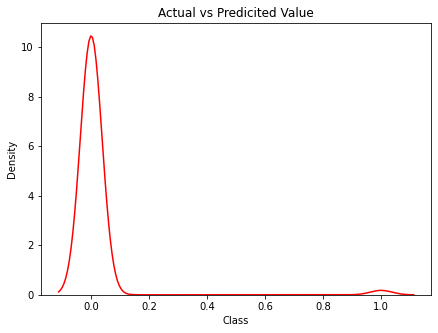

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_test_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicited Value')
plt.show()
plt.close()

In [ ]:
import pickle

In [ ]:
pickle.dump(classifier,open('mode_1.pkl','wb'))
model=pickle.load(open('mode_1.pkl','rb'))